# Homework 0: Gradient Descent Algorithm

**Kim Thach** *800793249*

*ECGR 5060*



## Introduction 

The following code will perform the steps needed to perform a Gradient Descent on a ML model.



In [21]:
# First import all needed libraries

import numpy as np              # Arrays
import pandas as pd             # Data structures
import matplotlib.pyplot as plt # Plotting


## Problem 1

Develop a code that run linear regression with gradient decent algorithm for each of the explanatory variables in isolation. In this case, you assume that in each iteration, only one explanatory variable (either X1, or X2, or X3) is explaining the output. Basically, you need to do three different training, one per each explanatory variable. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters to zero (theta to zero).

* Report the linear model you found for each explanatory variable.
* Plot the final regression model and loss over the iteration per each explanatory variable.

* **Which explanatory variable has the lower loss (cost) for explaining the output (Y)?**

* **Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration.**

In [22]:
# Read in CSV file
# The CSV file should be contained in the same directory

df = pd.read_csv('D3.csv')

#Let's check out the first 5 rows of our dataset

print(df.head())
print(len(df))

        0.0  3.4399999999999999  0.44000000000000039  4.387545011044053
0  0.040404            0.134949             0.888485           2.679650
1  0.080808            0.829899             1.336970           2.968490
2  0.121212            1.524848             1.785455           3.254065
3  0.161616            2.219798             2.233939           3.536375
4  0.202020            2.914747             2.682424           3.815420
99


In [23]:
# Define explanatory variables (First 3 columns)

x1 = df.values[:,0]
x2 = df.values[:,1]
x3 = df.values[:,2]
y = df.values[:,3]
m = len(y)
print(x1)

[0.04040404 0.08080808 0.12121212 0.16161616 0.2020202  0.24242424
 0.28282828 0.32323232 0.36363636 0.4040404  0.44444444 0.48484848
 0.52525253 0.56565657 0.60606061 0.64646465 0.68686869 0.72727273
 0.76767677 0.80808081 0.84848485 0.88888889 0.92929293 0.96969697
 1.01010101 1.05050505 1.09090909 1.13131313 1.17171717 1.21212121
 1.25252525 1.29292929 1.33333333 1.37373737 1.41414141 1.45454545
 1.49494949 1.53535354 1.57575758 1.61616162 1.65656566 1.6969697
 1.73737374 1.77777778 1.81818182 1.85858586 1.8989899  1.93939394
 1.97979798 2.02020202 2.06060606 2.1010101  2.14141414 2.18181818
 2.22222222 2.26262626 2.3030303  2.34343434 2.38383838 2.42424242
 2.46464646 2.50505051 2.54545455 2.58585859 2.62626263 2.66666667
 2.70707071 2.74747475 2.78787879 2.82828283 2.86868687 2.90909091
 2.94949495 2.98989899 3.03030303 3.07070707 3.11111111 3.15151515
 3.19191919 3.23232323 3.27272727 3.31313131 3.35353535 3.39393939
 3.43434343 3.47474747 3.51515152 3.55555556 3.5959596  3.63636

### Training 1

**Cost/loss function**

h = theta_0 + theta_1*x_1

x_0 is always one, create a vector full of 1 to the length of the sample points.

Calculated Model = [x0 , x1] * [theta_0 theta_1] 

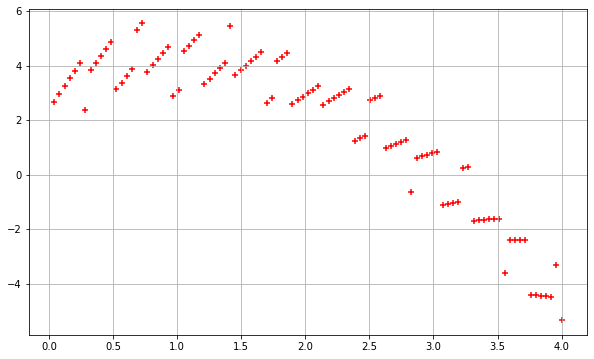

In [24]:
# Parameters and values related to x1
plt.figure()
plt.scatter(x1,y,color='red',marker='+')
plt.grid()
plt.rcParams["figure.figsize"] = (10,6)

# Create a vector of ones

x0=np.ones((m,1))

# Reshape the vector into a [1 x m] vector vs. the original [m x 1] to later stack

x_1=x1.reshape(m,1)

# Stack the 2 vectors together

X=np.hstack((x0,x_1))

# Set the number of parameters in your model

theta=np.zeros(2)


###  Compute cost for linear regression.  

The equation for the cost function is as follows:

$ J = \frac{1}{2m} \sum \limits_{i=1} ^{m} \sqrt{(y(x_{i}) - h(x_{i}))^2}$


In [25]:
# Training Loop

def compute_cost(X,y,theta):
    
    """ 
    Compute cost for linear regression.

    Input Parameters
    ----------------
    X : 2D array where each row represent the training example and each column represent
        m= number of training examples
        n= number of features (including x0 column of ones)
    y: 1D array of labels/target value for each training example. Dimesion (1 x m)

    theta :  1D array of fitting paramenters or weights. Dimension (1 x n)

    Output Parameters
    ----------------
    J: Scalar value.
    """

    predictions = X.dot(theta)
    errors = np.subtract(predictions,y)
    sqrErrors = np.square(errors)
    J = 1/(2*m)*np.sum(sqrErrors)
    
    return J


In [26]:
cost = compute_cost(X,y, theta)
print('The cost for given values of theta_0 and theta_1= ', cost)


The cost for given values of theta_0 and theta_1=  5.483015861682611


### Gradient Descent

Insert equation

In [27]:
def gradient_descent(X,y,theta,alpha,iterations):

    cost_hist = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta = theta - sum_delta
        cost_hist[i] = compute_cost(X,y,theta)

    return theta, cost_hist
    

In [28]:
theta = [0,0]
iterations = 17
alpha = 0.01

In [32]:
theta = [0,0]
iterations = 17
alpha = 0.01
theta, cost_hist = gradient_descent(X,y,theta,alpha,iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_hist)

modelx = theta[1] + theta[2]*X

Final value of theta = [0.27160654 0.07080825]
cost_history = [5.4416155  5.40304386 5.36697031 5.33310389 5.30118858 5.27099905
 5.24233703 5.215028   5.18891841 5.16387309 5.13977307 5.11651366
 5.09400269 5.07215902 5.05091124 5.03019648 5.00995936]


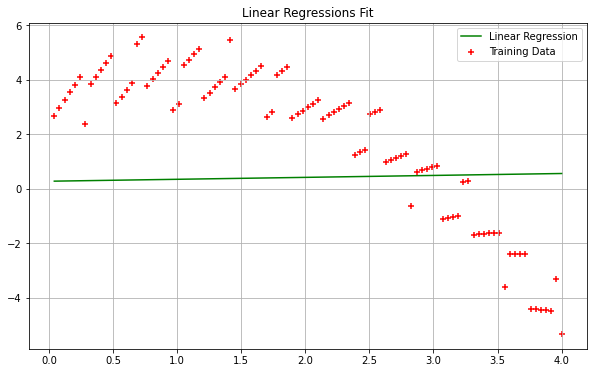

In [33]:
plt.scatter(X[:,1],y,color='red',marker='+',label='Training Data')
plt.plot(X[:,1],X.dot(theta),color='green',label='Linear Regression')

plt.rcParams['figure.figsize'] = (10,6)
plt.grid()
plt.title('Linear Regressions Fit')
plt.legend()


Text(0.5, 1.0, 'Convergence of gradient descent')

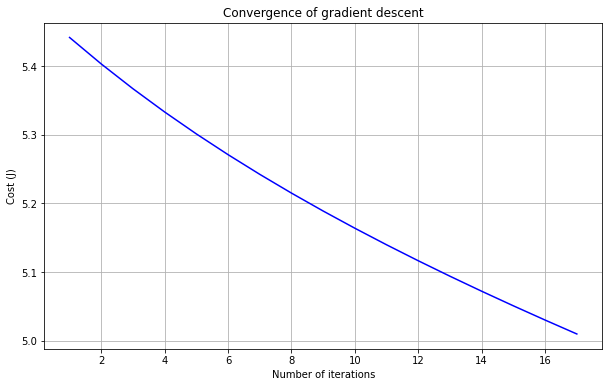

In [39]:
plt.plot(range(1,iterations+1),cost_hist,color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')


### Training 2


In [ ]:
x2


### Training 3


In [ ]:
x3


## Problem 2

This time, run linear regression with gradient descent algorithm using all three explanatory variables. For the learning rate, explore different values between 0.1 and 0.01 (your choice). Initialize your parameters (theta to zero).

* Report the final linear model you found the best. 
* Plot loss over the iteration.
* Based on your training observations, describe the impact of the different learning rates on the final loss and number of training iteration.
* Predict the value of y for new (X1, X2, X3) values (1, 1, 1), for (2, 0, 4), and for (3, 2, 1)

Several parameters, organize parameters into a matrix....